In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon

In [37]:
## API

def put_point(x, y, caption, dx=0, dy=0, marker='o', color='black', s=4, axis=None):
    axis = axis or plt.gca()
    axis.scatter(x, y, marker='o', color='black', s=4)
    axis.text(x + dx, y + dy, caption)
    

def put_circle(x, y, r, fcolor='white', bcolor='black', s=4, fill=True, ls='-', axis=None):
    axis = axis or plt.gca()
    circle = Circle((x, y), r, 
                    edgecolor=bcolor, facecolor=fcolor, linewidth=s, fill=fill, ls=ls,
                    lw=s)
    axis.add_patch(circle)
    
def put_grad_background(x_min, x_max, y_min, y_max, g_func,
                        n_mesh=256, cmap='binary', vmin=0, vmax=1):
    dx = (x_max - x_min)/n_mesh
    dy = (y_max - y_min)/n_mesh
    x, y = np.mgrid[slice(x_min, x_max, dx),
                    slice(y_min, y_max, dy)]
    G = g_func(x, y)
    
    plt.pcolormesh(x, y, G, cmap=cmap, vmin=vmin, vmax=vmax)

### archimed_1

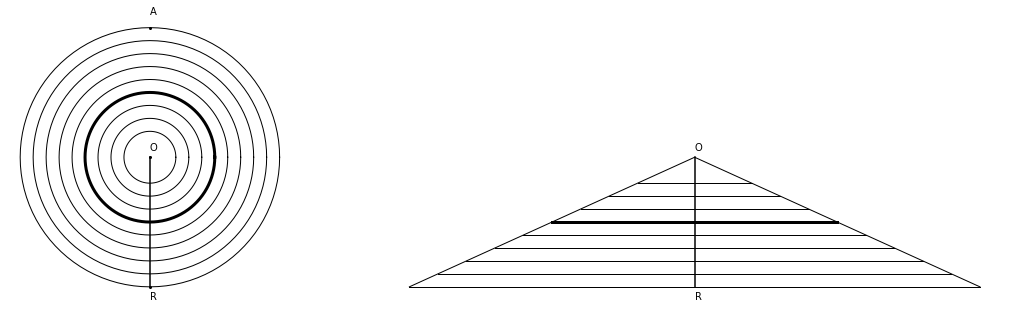

In [7]:
n = 100
N = 10
plt.axis('equal')

# circle
for i in range(2, N+1):
    r = i*1/N
    ts = np.array([j*2*math.pi/n for j in range(n+1)])
    xs = r*np.cos(ts)
    ys = r*np.sin(ts)
    plt.plot(xs, ys, color='black', linewidth=3 if i==5 else 1)

put_point(0, 0,  'O', dx=0, dy=0.05)
put_point(0, -1, 'R', dx=0, dy=-0.1)
put_point(0, 1,  'A', dx=0, dy=0.1)

plt.plot([0, 0], [0, -1], color='black')

# triangle

c = 0.7
tmin = 2
tmid = tmin + c*np.pi
tmax = tmid + c*np.pi
for i in range(2, N+1):
    r = i*1/N
    ts = np.array([j*2*math.pi/n for j in range(n+1)])
    xs = [tmid - i*c*np.pi/N, tmid + i*c*np.pi/N]
    ys = [-i/N, -i/N]
    plt.plot(xs, ys, color='black', linewidth=3 if i==5 else 1)

xs = [tmin, tmid, tmax]
ys = [-1, 0, -1]
plt.plot(xs, ys, color='black', linewidth=1)
plt.plot([tmid, tmid], [0, -1], color='black')
plt.text(tmid, 0.05, 'O')
plt.text(tmid, -1.1, 'R')

plt.gcf().set_size_inches(14, 4)
plt.xlim(-1.1, 6.67)
# plt.ylim(0, 1)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.axis('off')

plt.savefig('../images/archimed_1.eps', format='eps')
plt.show()

### atom_1

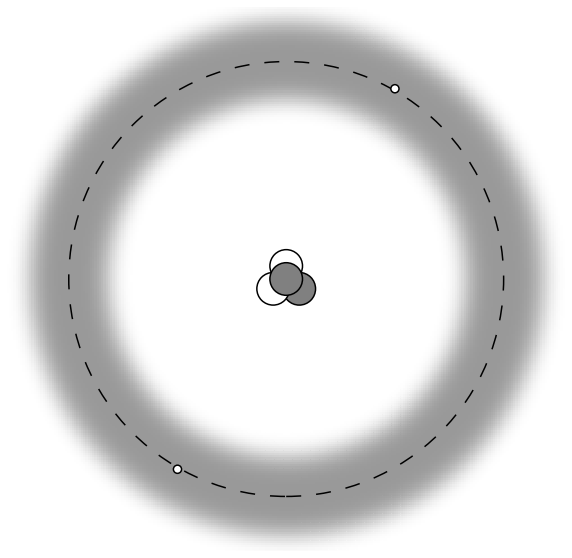

In [45]:
## --------- params

x_min = -10.6
x_max =  10.6
y_min = -10.6
y_max =  10.6

def g_func(x, y):
    r = np.sqrt(x**2 + y**2)
    G = 0.4*np.exp(-0.17*(r - 8)**4)
    return G 
    
r = 0.6
s = 1.5

## --------- image

put_grad_background(x_min, x_max, y_min, y_max, g_func)
 
put_circle(0, 0.8*r, r, s=s)
put_circle(0.8*r, -0.6*r, r, fcolor='gray', s=s)
put_circle(-0.8*r, -0.6*r, r, s=s)
put_circle(0, 0, r, fcolor='gray', s=s)

put_circle(0, 0, 8, fill=False, ls=(0, (10,10)), s=s)

put_circle(4, 7, 0.15, s=s)
put_circle(-4, -7, 0.15, s=s)

## --------- settings

plt.axis('equal')
plt.gcf().set_size_inches(10, 10)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axis('off')

plt.savefig('../images/atom_1.eps', format='eps')
plt.show()